In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('vectorspacemodellingsheet.csv')

In [4]:
df.shape

(14, 5)

In [5]:
df.columns

Index(['Question number', 'Offline 0', 'Online 1', 'Online 0', 'Online 1.1'], dtype='object')

In [6]:
df.describe()

,Question number,Offline 0,Online 1,Online 0,Online 1.1
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,26.071429,18.928571,28.785714,16.214286
std,4.1833,9.351794,9.351794,7.018422,7.018422
min,1.0000,11.000000,3.000000,17.000000,5.000000
25%,4.2500,19.000000,12.000000,24.250000,13.000000
50%,7.5000,23.500000,21.500000,28.500000,16.500000
75%,10.7500,33.000000,26.000000,32.000000,20.750000
max,14.0000,42.000000,34.000000,40.000000,28.000000


In [7]:
D = df.shape[0]

In [8]:
df

,Question number,Offline 0,Online 1,Online 0,Online 1.1
0,1,42,3,40,5
1,2,11,34,24,21
2,3,30,15,32,13
3,4,34,11,37,8
4,5,30,15,32,13
5,6,16,29,17,28
6,7,24,21,30,15
7,8,18,27,27,18
8,9,22,23,23,22
9,10,40,5,40,5


In [9]:
doff0 = df[df['Offline 0']!=0]
doff1 = df[df['Online 1']!=0]
don0 = df[df['Online 0']!=0]
don1 = df[df['Online 1.1']!=0]
doff1.shape

(14, 5)

In [18]:
import math
idf_off_zero = math.log(D/(doff0.shape[1]+1))
idf_off_one = math.log(D/(doff1.shape[1]+1))
idf_on_zero = math.log(D/(don0.shape[1]+1))
idf_on_one = math.log(D/(don1.shape[1]+1))
#idf_off =pd.DataFrame['Offline 0':[idf_off_zero],'Online 0':[idf_off_one]]
idf_off = pd.DataFrame(data = [[idf_off_zero,0],[0,idf_off_one]],columns = ['Offline 0','Online 1'])
idf_on = pd.DataFrame([[idf_on_zero,0],[0,idf_on_one]],columns = ['Online 0','Online 1.1'])
print(idf_off)
print(idf_on)

   Offline 0  Online 1
0   0.847298  0.000000
1   0.000000  0.847298
   Online 0  Online 1.1
0  0.847298    0.000000
1  0.000000    0.847298


In [11]:
dfoff = df.loc[:,'Offline 0':'Online 1']
dfon = df.loc[:,'Online 0':'Online 1.1']
dfoff

,Offline 0,Online 1
0,42,3
1,11,34
2,30,15
3,34,11
4,30,15
5,16,29
6,24,21
7,18,27
8,22,23
9,40,5


In [19]:
tf_idf_off = dfoff.dot(idf_off.T)
tf_idf_on = dfon.dot(idf_on.T)
tf_idf_on

,0,1
0,33.891914,4.236489
1,20.335149,17.793255
2,27.113532,11.014872
3,31.350021,6.778383
4,27.113532,11.014872
5,14.404064,23.724340
6,25.418936,12.709468
7,22.877042,15.251361
8,19.487851,18.640553
9,33.891914,4.236489


In [13]:
i = 0
l = []
while(i<tf_idf_off.shape[0]):
    a1 = float(tf_idf_off.loc[i][0])
    b1 = float(tf_idf_off.loc[i][1])
    a2 = float(tf_idf_on.loc[i][0])
    b2 = float(tf_idf_on.loc[i][0])
    a = (a1**2 + b1**2)**(1/2)
    b = (a2**2+ b2**2)**(1/2)
    prod = a1*a2+b1*b2
    val = prod/(a*b)
    l.append(val)
    i=i+1
l

[0.7556890827898175,
 0.8904346821960805,
 0.9486832980505138,
 0.8904346821960805,
 0.9486832980505138,
 0.9607141828411424,
 0.9977851578566088,
 0.9805806756909203,
 0.9997531778316101,
 0.7893522173763262,
 0.99975317783161,
 0.9713990064967775,
 0.99975317783161,
 0.8741572761215377]

In [14]:
angles = []
for i in l:
    angles.append(math.degrees(math.acos(i)))
angle = pd.DataFrame(data = angles)

angle

,0
0,40.914383
1,27.072080
2,18.434949
3,27.072080
4,18.434949
5,16.113418
6,3.814075
7,11.309932
8,1.273030
9,37.874984


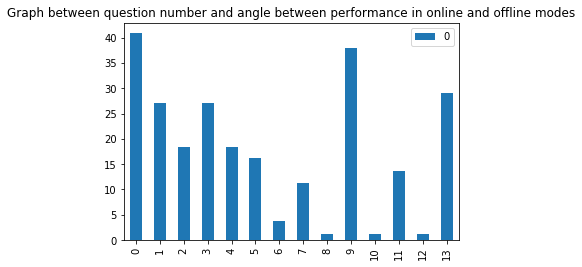

In [20]:
angle.plot(kind = 'bar',legend = True,title = 'Graph between question number and angle between performance in online and offline modes')

In [16]:
analysis = []
for i in angles :
    if i<10:
        analysis.append("Questions are not so different")
    elif i>10:
        analysis.append("Questions are very different")
analysis

['Questions are very different',
 'Questions are very different',
 'Questions are very different',
 'Questions are very different',
 'Questions are very different',
 'Questions are very different',
 'Questions are not so different',
 'Questions are very different',
 'Questions are not so different',
 'Questions are very different',
 'Questions are not so different',
 'Questions are very different',
 'Questions are not so different',
 'Questions are very different']